Default Of Credict Card Client: Machine Learning Project

Seeniya George

Entri Elevate

 Problem Statement Financial institutions face challenges in managing credit risk due to client defaults. Using the Default of Credit Card Clients Dataset, the goal is to build a machine learning model to:

    Predict the likelihood of a client defaulting on their credit card payments.
    Provide actionable insights to improve lending decisions and risk-based pricing

Objective The project aims to:

    Develop a classification model to predict whether a client will default.
    Use model predictions to categorize clients into low, medium, and high-risk groups.
    Interpret feature importance to derive actionable business insights.

 Dataset Overview

 Data Source

The **Default of Credit Card Clients Dataset** contains:
- 30,000 records of credit card clients.
- Features include demographic, financial, and behavioral attributes (e.g., age, credit limit, payment history).
- Target variable: `default.payment.next.month` (1 = default, 0 = no default).

-Gender (1 = male; 2 = female).
-Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
-Marital status (1 = married; 2 = single; 3 = others).
-Age (year).
-The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; 
. . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, roc_curve, classification_report,
                             confusion_matrix)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, roc_curve, auc
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
print("Loading default of credict card client...")
data=pd.read_csv('credit_customer.csv')
data.head(10)

Loading default of credict card client...


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
df=pd.DataFrame(data)

In [27]:
df.shape

(30000, 25)

In [28]:
#Basic Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [29]:
df.duplicated().sum()

0

In [30]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [31]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [32]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [33]:
# 3. Exploratory Data Analysis
print("\nPerforming Exploratory Data Analysis...")


Performing Exploratory Data Analysis...


In [34]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [35]:
#removing data columns form dataset
df.drop(columns=['MARRIAGE'],inplace=True)
print('Dataframe after removing date column permently\n')
df.head()

Dataframe after removing date column permently



,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
#To rename the column heading
df.rename(columns={'LIMIT_BAL':'CREDIT_LIMIT'},inplace=True)

In [37]:
df.head()

,ID,CREDIT_LIMIT,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
#outliyers
numeric_columns =  df.select_dtypes(include = ['number'])

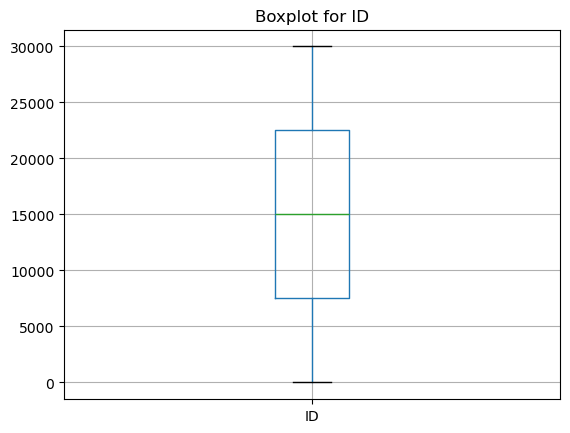

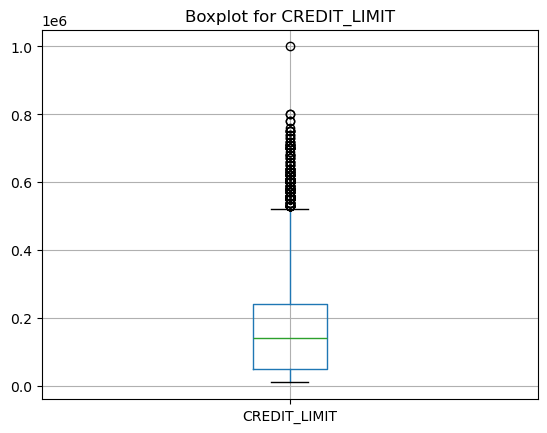

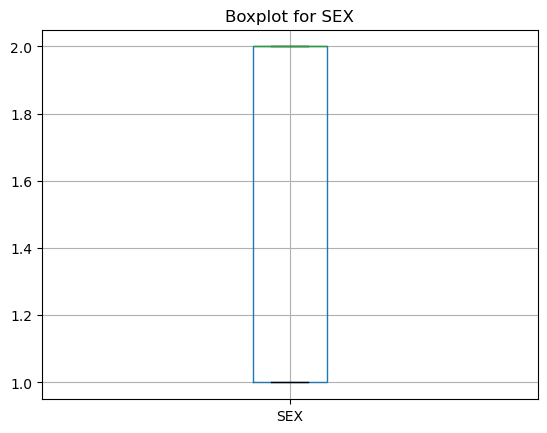

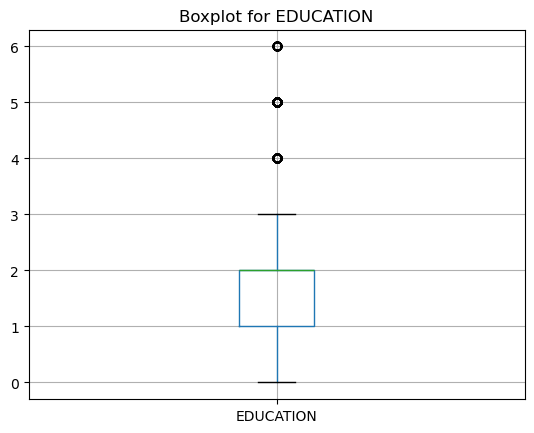

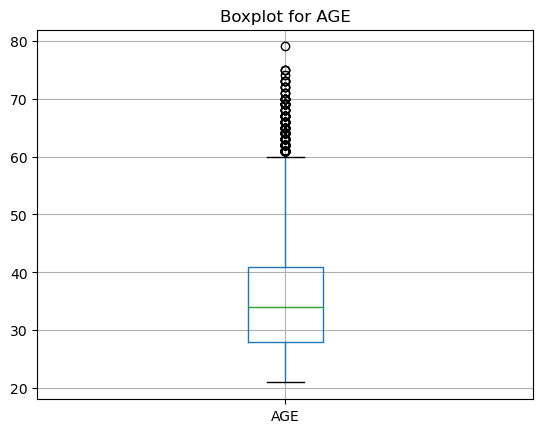

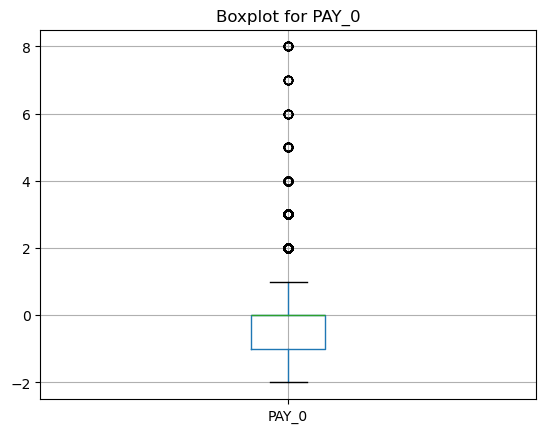

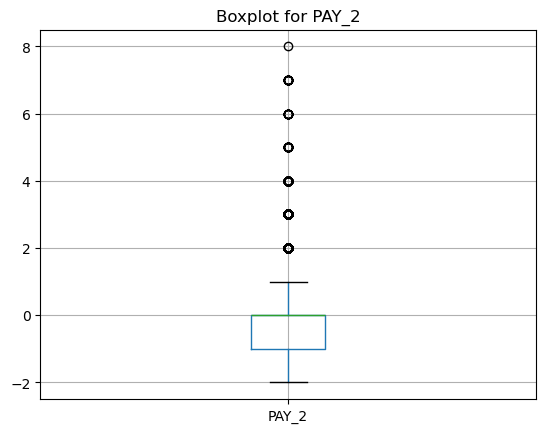

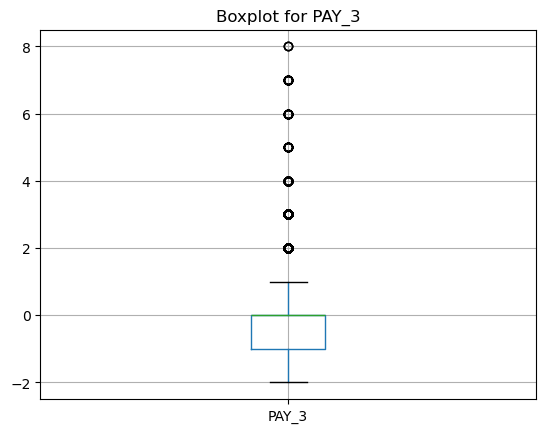

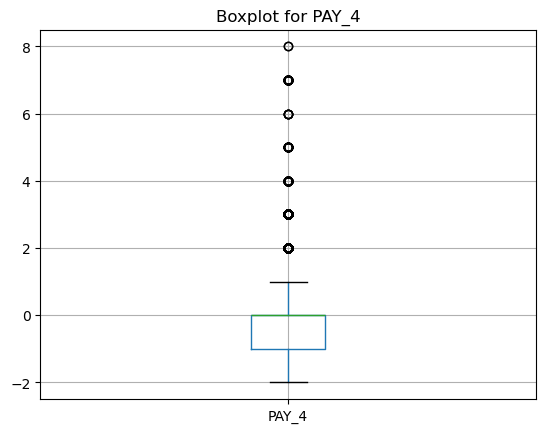

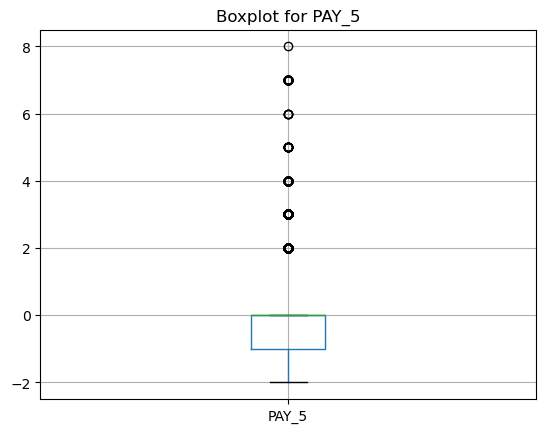

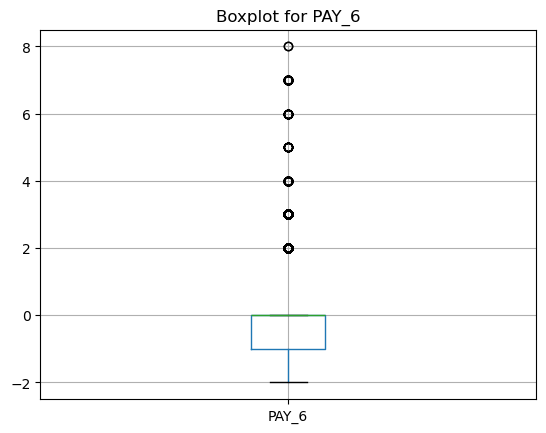

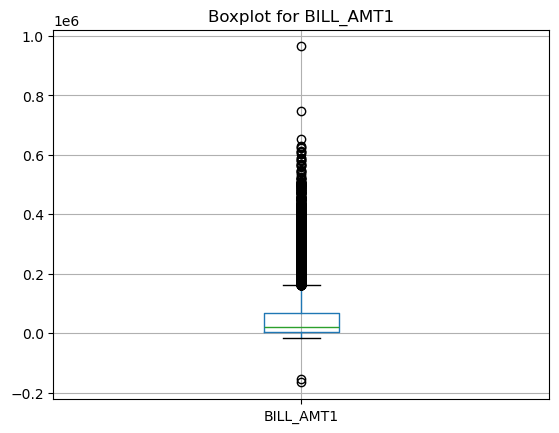

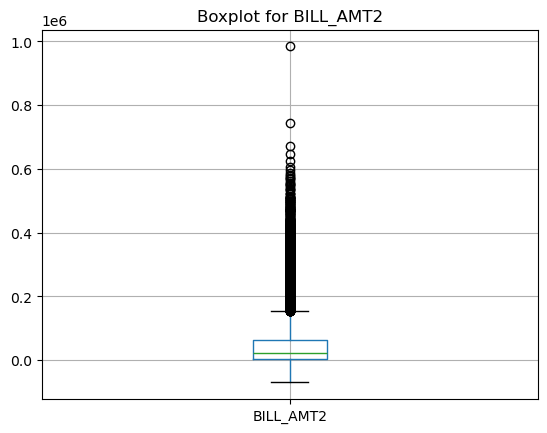

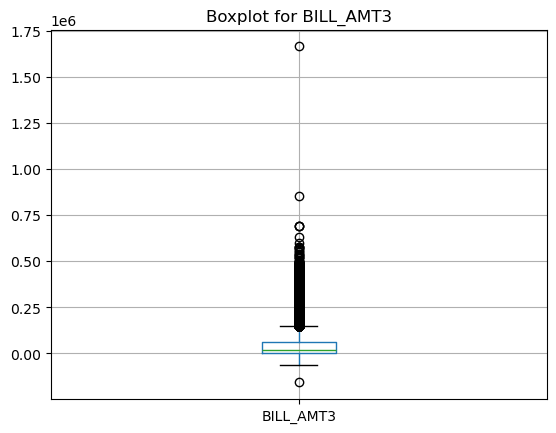

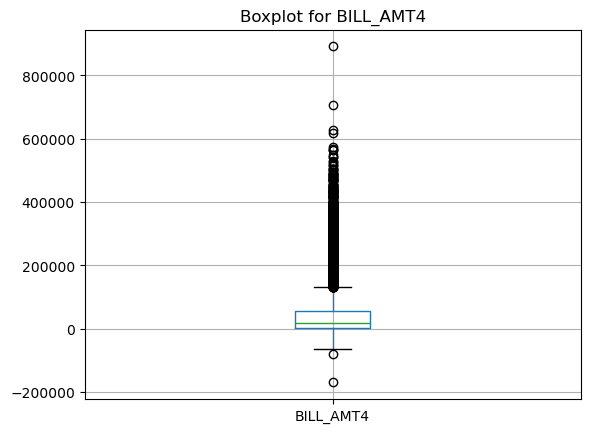

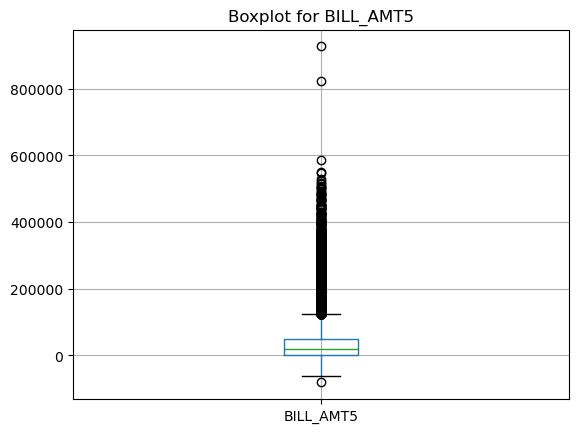

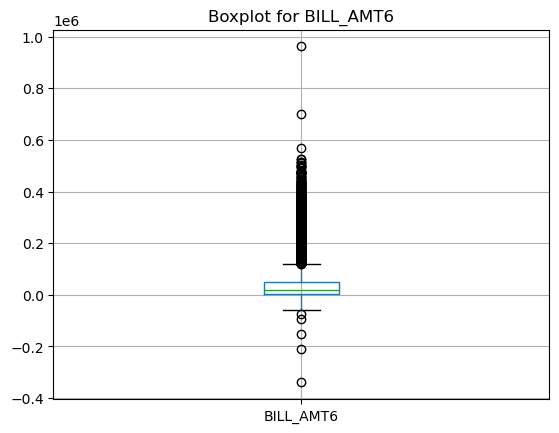

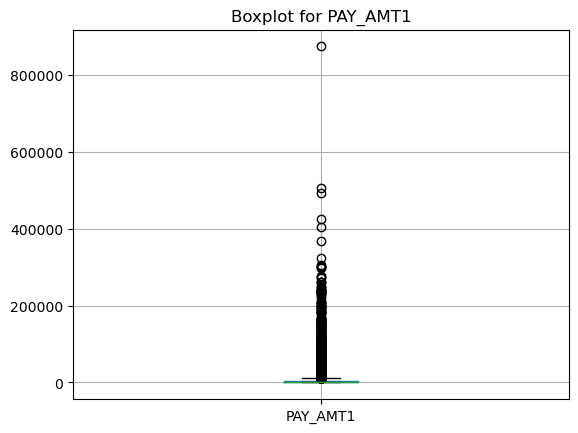

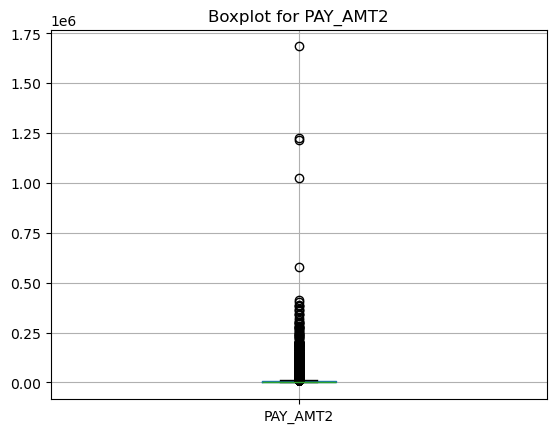

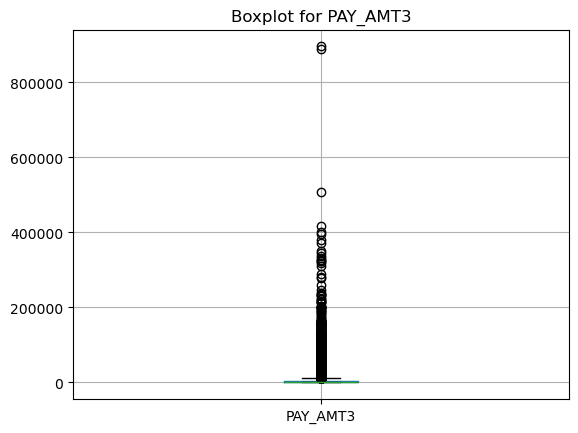

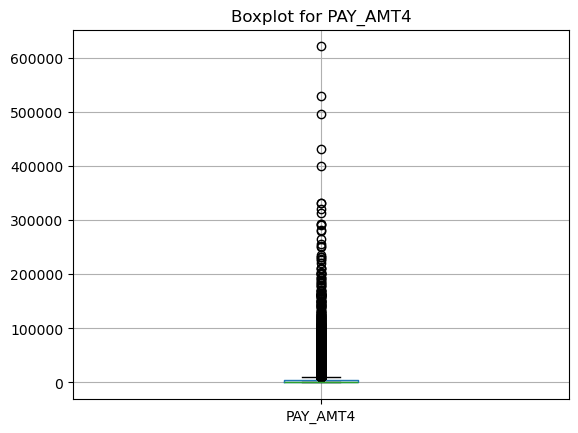

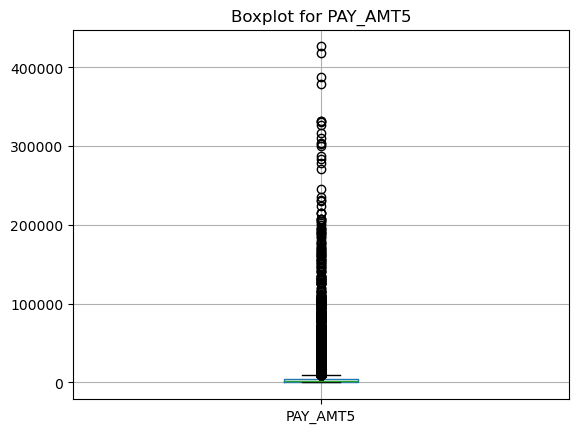

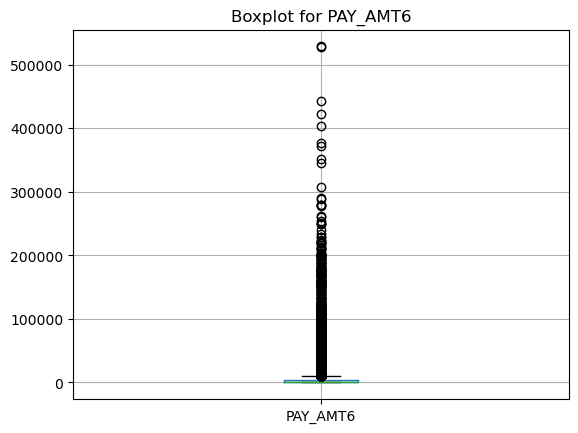

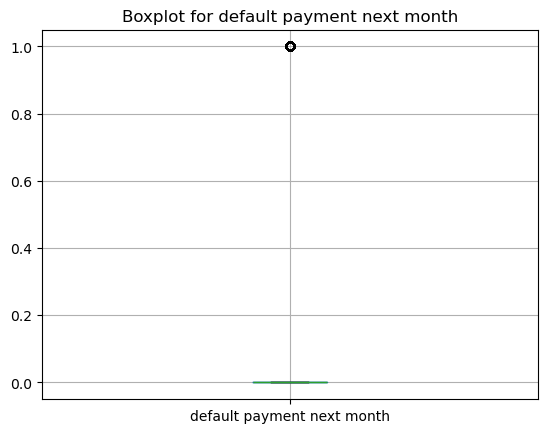

In [39]:
#forloop
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Boxplot for {column}")

In [40]:
# Function to detect and cap outliers using IQR
def cap_outliers_iqr(df):
    outliers_dict = {}  # Dictionary to store the number of outliers for each column
    
   
    for column in numeric_columns:  # Only consider numeric columns
        # Calculate the Q1, Q3, and IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify the outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = len(outliers)
        
        # Capping the outliers with the mean value of the column
        mean_value = df[column].mean()
        df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    
    return df, outliers_dict

# Apply outlier capping
df, outliers_dict = cap_outliers_iqr(df)

# Output the number of outliers per column
print("Outliers in each column:")
for column, outlier_count in outliers_dict.items():
    print(f"{column}: {outlier_count} outliers")

Outliers in each column:
ID: 0 outliers
CREDIT_LIMIT: 167 outliers
SEX: 0 outliers
EDUCATION: 454 outliers
AGE: 272 outliers
PAY_0: 3130 outliers
PAY_2: 4410 outliers
PAY_3: 4209 outliers
PAY_4: 3508 outliers
PAY_5: 2968 outliers
PAY_6: 3079 outliers
BILL_AMT1: 2400 outliers
BILL_AMT2: 2395 outliers
BILL_AMT3: 2469 outliers
BILL_AMT4: 2622 outliers
BILL_AMT5: 2725 outliers
BILL_AMT6: 2693 outliers
PAY_AMT1: 2745 outliers
PAY_AMT2: 2714 outliers
PAY_AMT3: 2598 outliers
PAY_AMT4: 2994 outliers
PAY_AMT5: 2945 outliers
PAY_AMT6: 2958 outliers
default payment next month: 6636 outliers


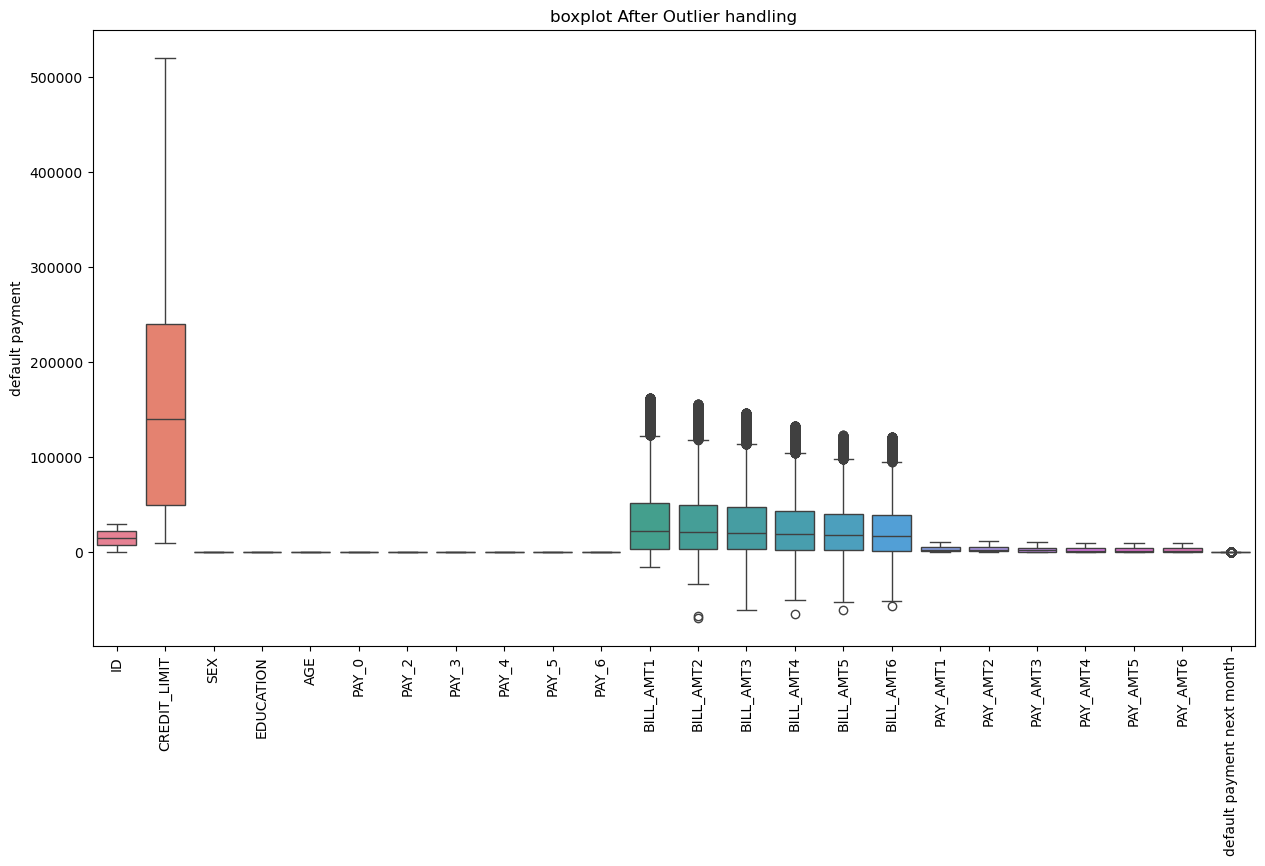

In [41]:
plt.figure(figsize=(15,8))
sns.boxplot(df)
plt.title("boxplot After Outlier handling")
plt.xticks(rotation=90)
plt.ylabel('default payment')
plt.show()

In [43]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['ID', 'CREDIT_LIMIT', 'SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [45]:
# Split the data based on the target variable
default = df[df['default payment next month'] == 1]['CREDIT_LIMIT']
non_default = df[df['default payment next month'] == 0]['CREDIT_LIMIT']

<Axes: xlabel='CREDIT_LIMIT', ylabel='Density'>

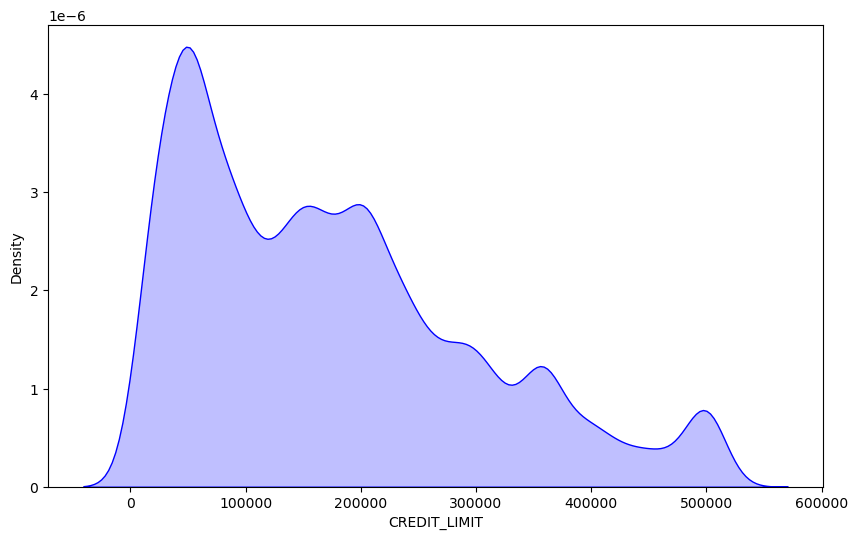

In [46]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(default, label='Default (1)', color='red', shade=True)
sns.kdeplot(non_default, label='Non-Default (0)', color='blue', shade=True)


<Axes: xlabel='CREDIT_LIMIT', ylabel='Count'>

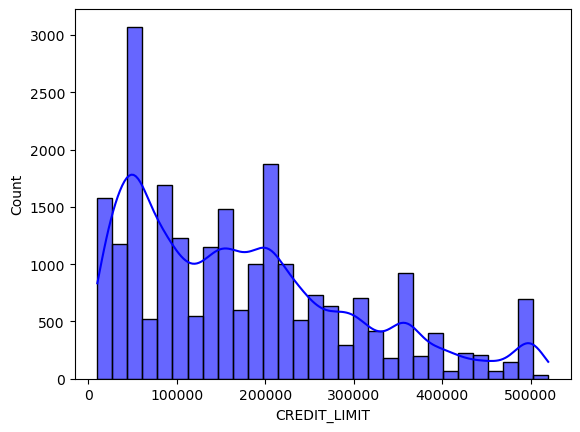

In [47]:
sns.histplot(default, label='Default (1)', color='red', kde=True, bins=30, alpha=0.6)
sns.histplot(non_default, label='Non-Default (0)', color='blue', kde=True, bins=30, alpha=0.6)

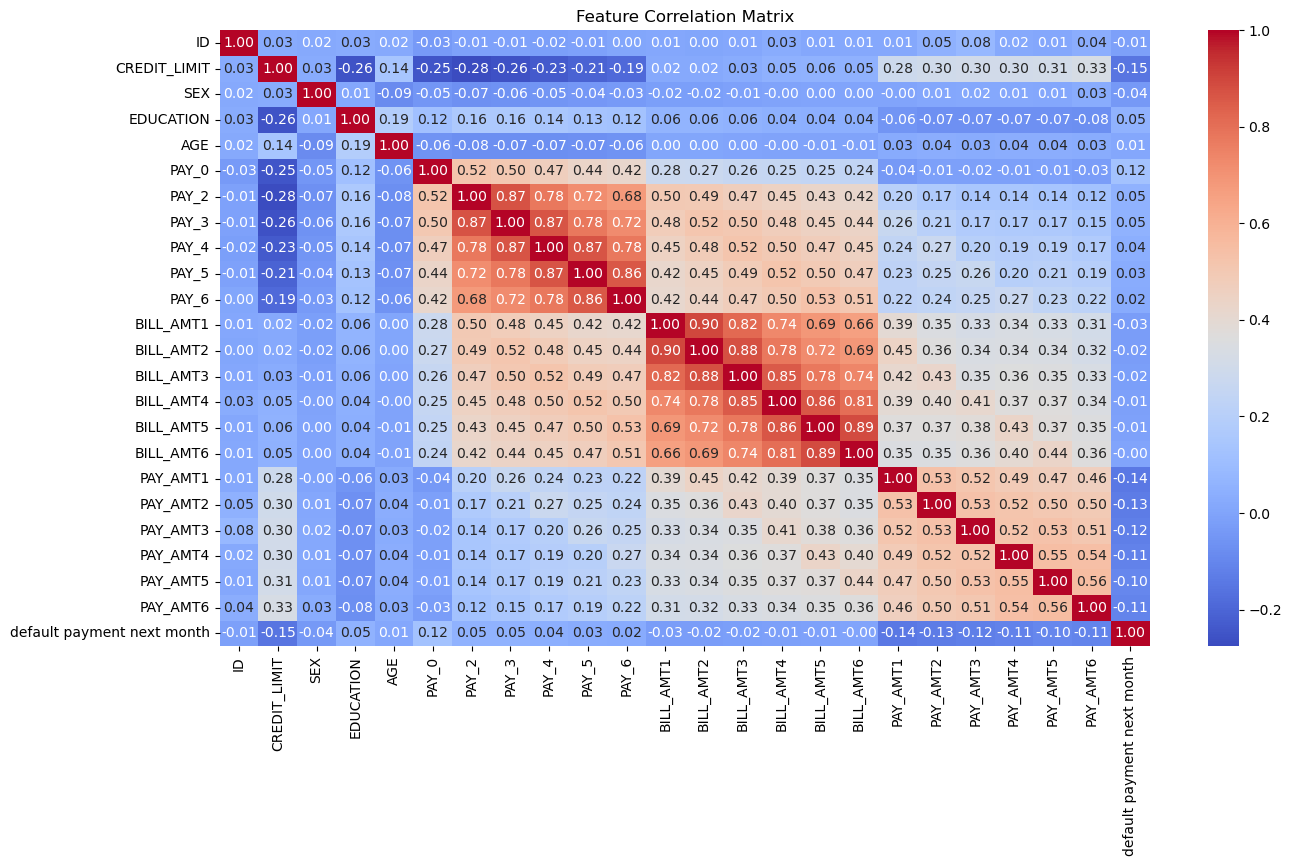

In [49]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


In [50]:
# Remove highly correlated features
threshold = 0.8
high_corr_features = [col for col in correlation_matrix.columns 
                      if any(correlation_matrix[col].abs() > threshold) and col != correlation_matrix.columns[0]]
print("Highly correlated features to remove:", high_corr_features)

Highly correlated features to remove: ['CREDIT_LIMIT', 'SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


In [52]:
#check skewness of numarical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
#numarical_features
print(df[numerical_features].skew())


ID                            0.000000
CREDIT_LIMIT                  0.884783
SEX                          -0.424183
EDUCATION                     0.275366
AGE                           0.596075
PAY_0                        -0.659781
PAY_2                        -1.223727
PAY_3                        -1.184935
PAY_4                        -1.156439
PAY_5                        -1.129470
PAY_6                        -1.038313
BILL_AMT1                     1.257988
BILL_AMT2                     1.254389
BILL_AMT3                     1.260984
BILL_AMT4                     1.269023
BILL_AMT5                     1.277431
BILL_AMT6                     1.301287
PAY_AMT1                      0.864059
PAY_AMT2                      0.904559
PAY_AMT3                      1.037988
PAY_AMT4                      0.896425
PAY_AMT5                      0.899043
PAY_AMT6                      0.878967
default payment next month    1.343504
dtype: float64


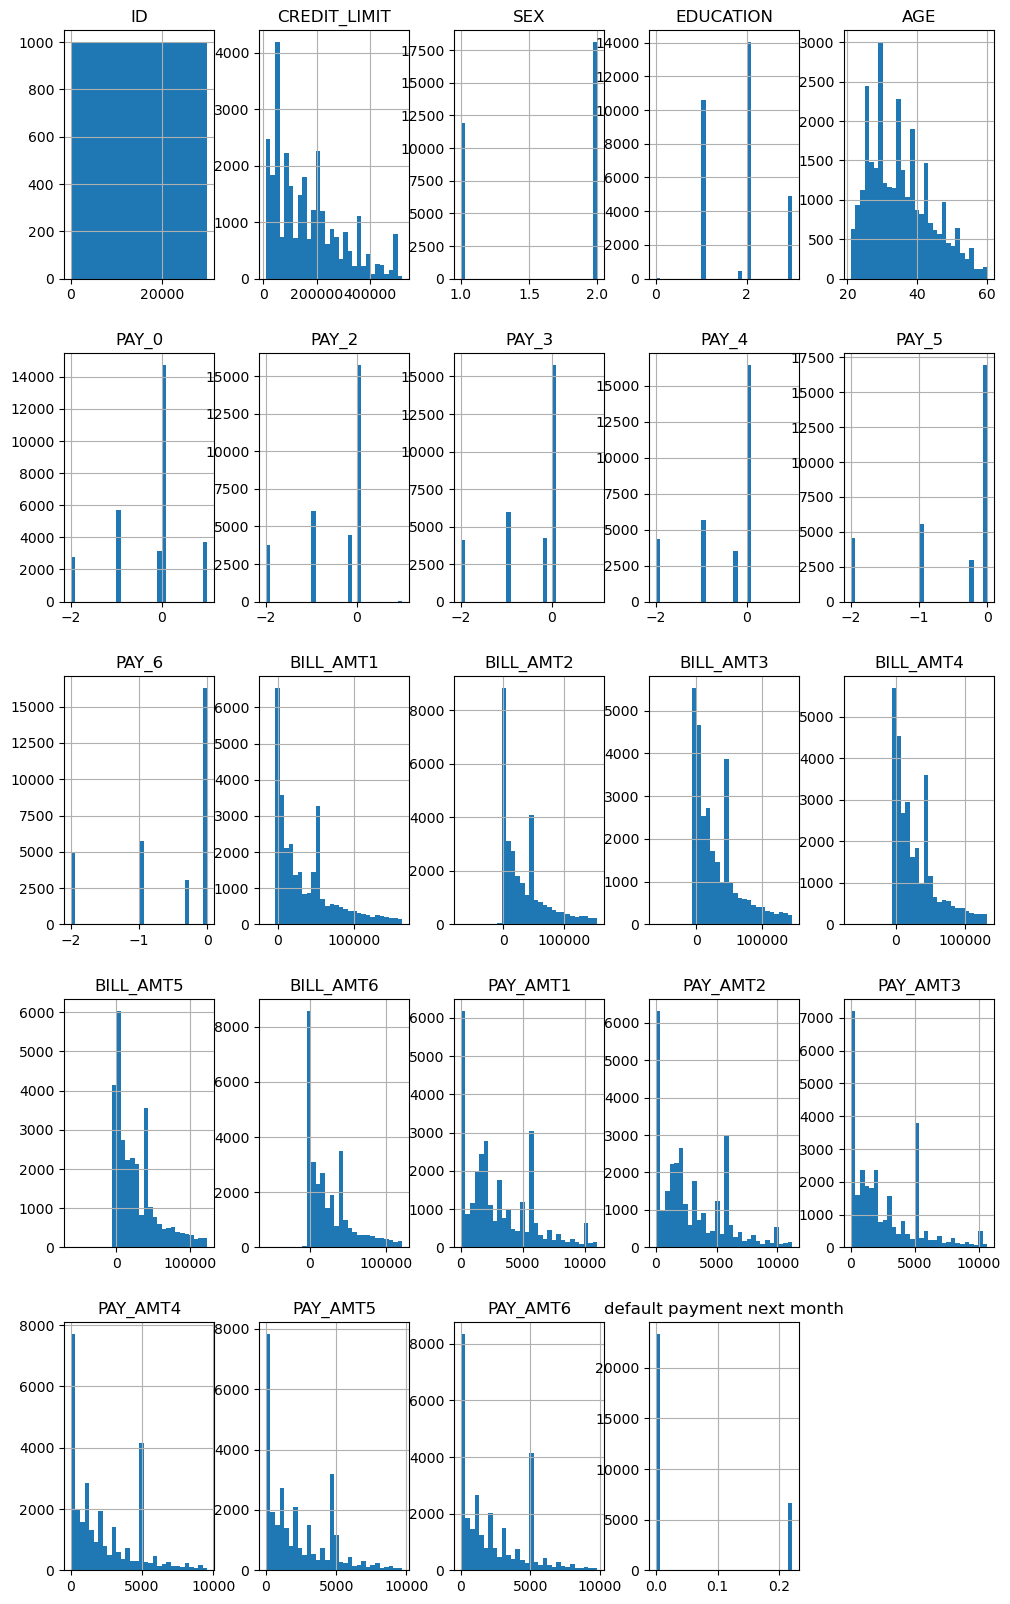

In [53]:
#each columns histogram plot
#plot histograms before transformed features
df.hist(figsize=(12,20),bins=30)
plt.show()

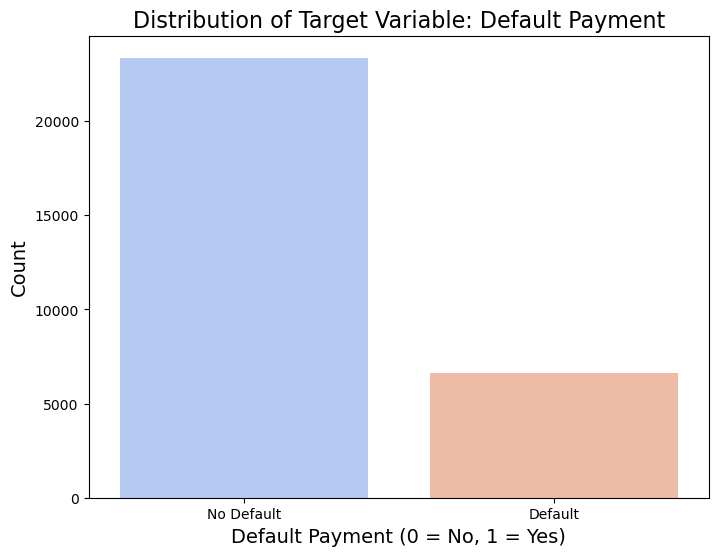

In [58]:
 #Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='default payment next month', data=df, palette='coolwarm')
plt.title("Distribution of Target Variable: Default Payment", fontsize=16)
plt.xlabel("Default Payment (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ["No Default", "Default"])
plt.show()

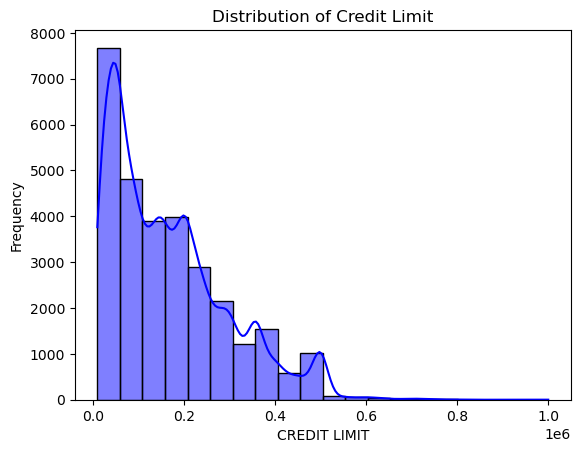

In [21]:
# Plot histogram for 'credit_limit'
sns.histplot(df['LIMIT_BAL'], kde=True, color='blue', bins=20)
plt.title('Distribution of Credit Limit')
plt.xlabel('CREDIT LIMIT')
plt.ylabel('Frequency')
plt.show()


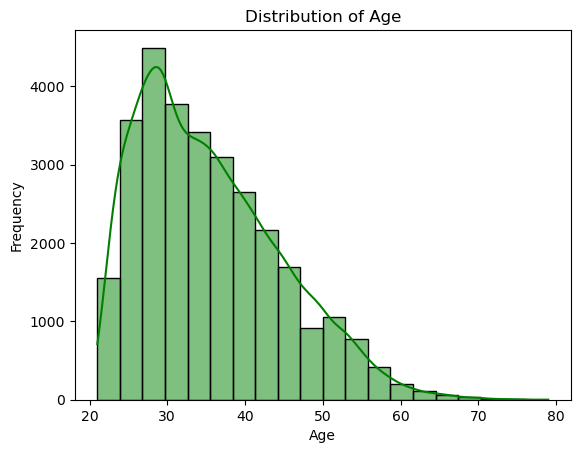

In [22]:
# Plot histogram for 'age'
sns.histplot(df['AGE'], kde=True, color='green', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

feature selection

Feature selection is a crucial step in machine learning to improve model performance, reduce overfitting, and enhance interpretability by identifying the most relevant predictors. Below are common methods for feature selection, categorized into three groups: filter methods, wrapper methods, and embedded methods.

In [9]:
# Define target and features
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']


In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler

StandardScaler()

In [12]:
 #  SelectKBest with different scoring functions
# F-Score (ANOVA rank base)
k_best_f = SelectKBest(score_func=f_classif, k=10)
X_kbest_f = k_best_f.fit_transform(X, y)
selected_features_f = X.columns[k_best_f.get_support()].tolist()
#print
selected_features_f

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4']

In [13]:
feature_names = df.columns


In [14]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

def perform_feature_selection(X_train, X_test, y_train, feature_names, k=15):
    """
    Perform feature selection using SelectKBest.
    Args:
        X_train (array or DataFrame): Scaled training feature data.
        X_test (array or DataFrame): Scaled testing feature data.
        y_train (array): Target variable for training data.
        feature_names (list): List of feature names corresponding to columns in X_train.
        k (int): Number of top features to select.
    Returns:
        X_train_selected (array): Transformed training data with selected features.
        X_test_selected (array): Transformed testing data with selected features.
        selected_features (list): Names of selected features.
        feature_scores (DataFrame): DataFrame with feature names and scores.
    """
    # Initialize SelectKBest with f_classif scoring function
    selector = SelectKBest(score_func=f_classif, k=k)
    
    # Fit and transform the training data
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    # Transform the test data
    X_test_selected = selector.transform(X_test)
    
    # Get selected feature names
    selected_features_mask = selector.get_support()
    selected_features = [feature_names[i] for i in range(len(feature_names)) if selected_features_mask[i]]
    
    # Get feature scores
    feature_scores = pd.DataFrame({
        'Feature': feature_names,
        'Score': selector.scores_
    })
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    
    return X_train_selected, X_test_selected, selected_features, feature_scores

In [15]:
# Define feature names if X_train_scaled is a DataFrame, otherwise generate synthetic names
if isinstance(X_train_scaled, pd.DataFrame):
    feature_names = X_train_scaled.columns
else:
    feature_names = [f"Feature_{i}" for i in range(X_train_scaled.shape[1])]

# Perform feature selection
k_features = 15
X_train_selected, X_test_selected, selected_features, feature_scores = perform_feature_selection(
    X_train_scaled, X_test_scaled, y_train, feature_names, k=k_features
)

# Display results
print("Selected Features:", selected_features)
print("Feature Scores:\n", feature_scores)

Selected Features: ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23']
Feature Scores:
        Feature        Score
6    Feature_6  2850.549420
7    Feature_7  1839.513969
8    Feature_8  1444.500432
9    Feature_9  1231.610511
10  Feature_10  1053.476961
11  Feature_11   887.619651
1    Feature_1   585.511064
18  Feature_18   111.262198
19  Feature_19    76.796282
23  Feature_23    72.784788
21  Feature_21    70.308972
20  Feature_20    69.705293
22  Feature_22    59.436591
2    Feature_2    44.612254
3    Feature_3    21.837912
4    Feature_4    13.631418
12  Feature_12     8.940984
5    Feature_5     7.009207
14  Feature_14     4.963530
13  Feature_13     4.554644
15  Feature_15     2.888644
0    Feature_0     2.810812
16  Feature_16     1.352795
17  Feature_17     0.702420


In [16]:
print("\nTop 15 Selected Features:")
print("-" * 50)
for i, feature in enumerate(selected_features, 1):
    score = feature_scores[feature_scores['Feature'] == feature]['Score'].values[0]
    print(f"{i}. {feature}: {score:.2f}")


Top 15 Selected Features:
--------------------------------------------------
1. Feature_1: 585.51
2. Feature_2: 44.61
3. Feature_3: 21.84
4. Feature_6: 2850.55
5. Feature_7: 1839.51
6. Feature_8: 1444.50
7. Feature_9: 1231.61
8. Feature_10: 1053.48
9. Feature_11: 887.62
10. Feature_18: 111.26
11. Feature_19: 76.80
12. Feature_20: 69.71
13. Feature_21: 70.31
14. Feature_22: 59.44
15. Feature_23: 72.78


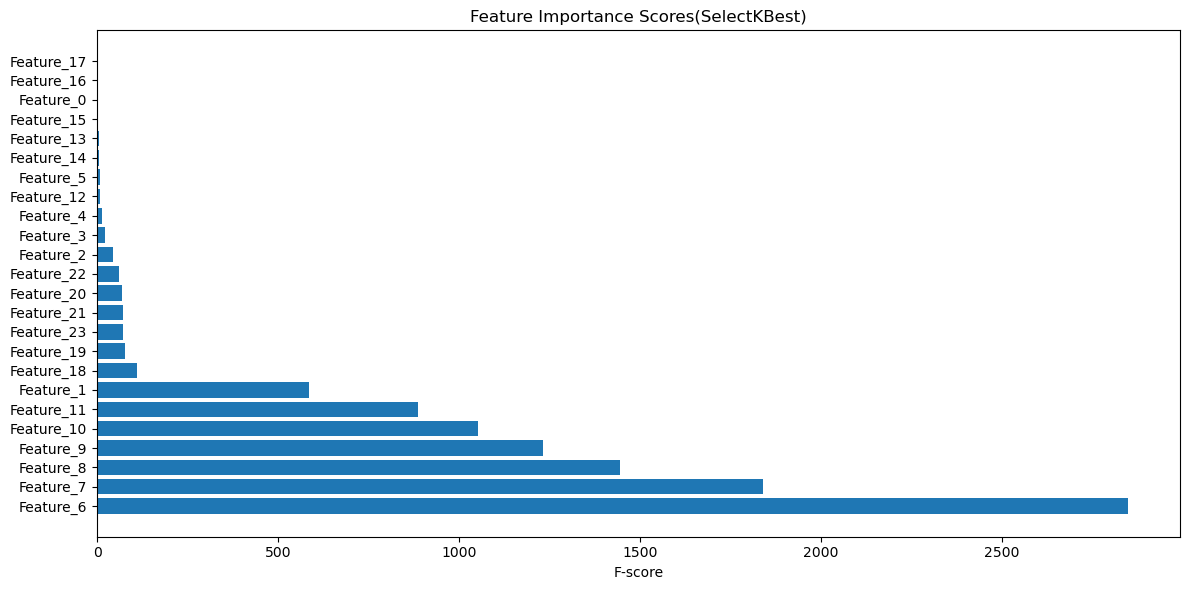

In [17]:
#Plot feature Score
plt.figure(figsize=(12,6))
plt.barh(range(len(feature_scores)), feature_scores['Score'])
plt.yticks(range(len(feature_scores)), feature_scores['Feature'], rotation=0)
plt.xlabel('F-score')
plt.title('Feature Importance Scores(SelectKBest)')
plt.tight_layout()
plt.show()
